<a href="https://colab.research.google.com/github/StephanieO-py/Mima-film-company-recommendation/blob/main/Recommedations_for_Mima_film_company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AfterWork Data Science: Data Visualisation with Matplotlib

## 1. Defining the Question

### a) Specifying the Data Analysis Question

We need to identify the kinds of movies that the Mima startup should create in order to have a profitable business.

### b) Defining the Metric for Success

We can gauge if our solution has satisfied the research question through:

Picking a movie or three from the dataset using the features given in the solution and checking if it brought in major profits or not.

### c) Understanding the context 

I'm a data science consultant working for Mima, a start-up company aiming to begin working in the filming industry. Through analysis of previous movies and their performance in the industry, we can advise them on how to best proceed in order to rake in major profits.

### d) Recording the Experimental Design

The steps that'll be used to answer the given questions are:
- Load and read the data/ obtain the data.
- Clean the data such that it does not contain any irregularities such as missing or duplicated data.
- Understanding what is required for each question i.e the features from the data involved.
- Plotting the appropriate visialization.
- Noting down the observations from the visualizations and making a suitable conclusion/recommendation.

### e) Data Relevance

The data provided is relevant because it is directly related to the main question we are trying to answer; in investigating the movie industry, it is relavant, suitable and appropriate that we use a dataset containing information about the fim industry dating back.

## 2. Reading the Data

In [1]:
# Loading libraries
# ---
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    

In [2]:
# Loading the dataset
# --- 
# Dataset url = http://bit.ly/MoviesDS
# --- 
# 
df = pd.read_csv('http://bit.ly/MoviesDS')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Determining the size 
# ---
#
df.shape

(10866, 21)

In [4]:
# Checking the datatypes
# ---
# 
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
# Statistical summary
# ---
#
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# Checking for missing values 
# ---
# 
df.isnull().sum()


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

## 3. External Data Source Validation

You can make sure your data matches other credible information. This ensures that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset.

External validation can often be as simple as checking your data against some other data i.e. country population your dataset with country population on world bank data.

Replace the text found on this text cell with your external data source validation information.

## 4. Data Preparation

In [7]:
# Dropping irrelevant columns
# ---
#
df.drop(['id','imdb_id', 'homepage', 'overview'], axis=1, inplace=True)

In [8]:
# Handling missing data
# ---
# 
df['cast'].fillna('missing', inplace=True )
df['director'].fillna('missing', inplace=True)
df['tagline'].fillna('missing', inplace=True)
df['keywords'].fillna('missing', inplace=True)
df['genres'].fillna('missing', inplace=True)
df['production_companies'].fillna('missing', inplace=True) 
df['budget'] = df['budget'].replace(0, np.NAN) 

In [9]:
# Previewing the outcome
# ---
# 
df.isnull().sum()

popularity                 0
budget                  5696
revenue                    0
original_title             0
cast                       0
director                   0
tagline                    0
keywords                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
# Checking for duplicates 
# ---
#
df.duplicated().sum()

1

In [11]:
# Dropping the duplicates 
# ---
#
df.drop_duplicates(inplace = True) 

# Checking for duplicates for comfirmation
# ---
#
df.duplicated().sum()

0


## 5. Solution Implementation

Here we investigate the questions that would help craft our recommendations.

### 5.a) Questions

#### **Question 1**: Do movies with a higher budget end up being popular?

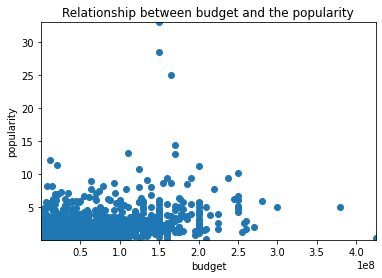

In [12]:
# Question 1
# ---
# Do movies with a higher budget end up being popular?
# ---
#

# Create a scatter plot to determine relationship between budget and the popularity
budget = df['budget']
popularity = df['popularity']

# Render 
plt.scatter(budget, popularity)

# Tweak & Label 
plt.title('Relationship between budget and the popularity')
plt.xlabel('budget')
plt.ylabel('popularity')
plt.autoscale(tight=True)

# Display
plt.show()

#### Observation
 1. As can be seen in the figure, most of the data points are clustered around the same area. The scatter plot indicates that there is little to no correlation between the budget and popularity. A higher budget will not guarantee that the movie will be popular and a low budget movie will not necessary mean that the movie will be unpopular.
 2. The movies that are seen to be popular fall in the middle of the budget scale .

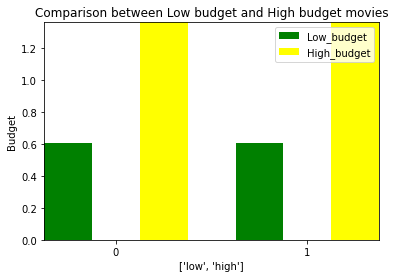

In [13]:
# Create a bar chart to compare low budget movies with high budget movies
# ---
# 

# create two groups (low and high budget movies) using the median
m = df['budget'].median()
low_budget =  df.query('budget < {}'.format(m))
high_budget =  df.query('budget >= {}'.format(m))

# check low budget and high budget mean values respecively 
mean_popularity_of_low_budget = low_budget['popularity'].mean()
mean_popularity_of_high_budget = high_budget['popularity'].mean()

# create a bar chart with the values we get above 
locations = [1,2]
heights = [mean_popularity_of_low_budget , mean_popularity_of_high_budget]
labels=['low','high']

# Hint: use tick_label parameter

x = np.arange(len(labels))  # the label locations
w = 0.25 # the width of the bars

# Add some text for labels, title and custom x-axis tick labels, etc.

plt.bar(x - w, mean_popularity_of_low_budget,label = 'Low_budget', width = w, color = 'green', align = 'center')
plt.bar(x + w, mean_popularity_of_high_budget,label = 'High_budget', width = w, color = 'yellow', align = 'center')

plt.autoscale(tight=True)

plt.xticks(x)
plt.xlabel(labels)
plt.ylabel("Budget")
plt.title("Comparison between Low budget and High budget movies")
plt.legend()
plt.show()

In [14]:
# Percentage difference
increase_percentage = (mean_popularity_of_high_budget - mean_popularity_of_low_budget) / mean_popularity_of_high_budget * 100
increase_percentage

55.50933772947093

### Observation
1. From the figure plotted above, it is observed that the bulk of the movie production companies prefer to work with high budgets as compared to low budget movies. The average percentage diffence between the two budgets is at 56%, 6% more than half.

**Question 2:** Does the length of the movie affect the vote count and popularity?

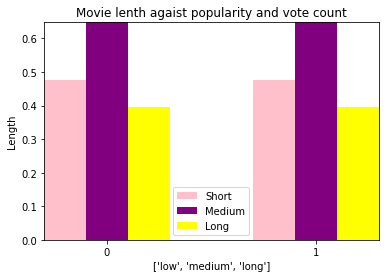

In [15]:
# Question 2
# ---
# Does the length of the movie affect the vote count and popularity?
# ---
# 

# Create 3 movie groups:  <60 min: short, 60 min <=  <= - 120 min: medium,  >120 min: long 
short =  df.query('runtime < {}'.format(100))
medium =  df.query('runtime < {}'.format(200))
longer = df.query('runtime > {}'.format(200))

# Check mean popularity of different movie lengths 
mean_popularity_of_short = short['popularity'].mean()
mean_popularity_of_medium = medium['popularity'].mean()
mean_popularity_of_long = longer['popularity'].mean()

# Create a bar chart of average popularity of different movie lengths
locations = [1,2,3]
heights = [mean_popularity_of_short, mean_popularity_of_medium, mean_popularity_of_long]
labels=['low','medium','long']
w = 0.2

# Add some text for labels, title and custom x-axis tick labels, etc.

plt.bar(x - w, mean_popularity_of_short,label = 'Short', width = w, color = 'pink', align = 'center')
plt.bar(x , mean_popularity_of_medium,label = 'Medium', width = w, color = 'purple', align = 'center')
plt.bar(x + w, mean_popularity_of_long,label = 'Long', width = w, color = 'yellow', align = 'center')

plt.autoscale(tight=True)

plt.xticks(x)
plt.xlabel(labels)
plt.ylabel("Length")
plt.title("Movie lenth agaist popularity and vote count")
plt.legend()
plt.show()

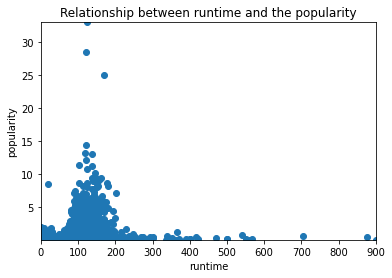

In [16]:
# Create a scatterplot to determine the relation between runtime and popularity 
# ---
# 
runtime = df['runtime']
popularity = df['popularity'] 

# Render 
plt.scatter(runtime, popularity)

# Tweak & Label 
plt.title('Relationship between runtime and the popularity')
plt.xlabel('runtime')
plt.ylabel('popularity')
plt.autoscale(tight=True)

# Display
plt.show()


### Observation
 1. As can be seen in the figure, most of the data points are clustered around the same area with some outliers spread out. The scatter plot indicates that there is little to no correlation between the movie runtime and popularity. A movie with 900 minutes runtime can be seen to have around the same votes as one that is 200 minutes long. 
 2. Across the runtime spectrum, from 0-900 minutes, we see that the popularity count lies mostly between 0 and 5.

**Question 3:** Does higher popularity mean higher profits?

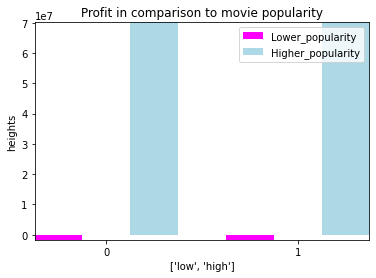

In [18]:
# Question 3
# ---
# Does higher popularity mean higher profits?
# ---
#

# Getting the mean of popularity 
m_popularity = df['popularity'].median()
lower_popularity =  df.query('popularity < {}'.format(m_popularity))
higher_popularity =  df.query('popularity >= {}'.format(m_popularity))

# Creating a new column called profit (profit = revenue - budget)
df['profit'] = df['revenue'] - df['budget']

# Calculating the average net profit for low_popularity and high_popularity
mean_profit_of_low_popularity = lower_popularity['profit'].mean()
mean_profit_of_high_popularity = higher_popularity['profit'].mean()

# create a bar chart with the values we get above 
locations = [1,2]
heights = [mean_profit_of_low_popularity, mean_profit_of_high_popularity]
labels=['low','high']
w = 0.25 # the width of the bars

# Add some text for labels, title and custom x-axis tick labels, etc.

plt.bar(x - w, mean_profit_of_low_popularity,label = 'Lower_popularity', width = w, color = 'magenta', align = 'center')
plt.bar(x + w, mean_profit_of_high_popularity,label = 'Higher_popularity', width = w, color = 'lightblue', align = 'center')

plt.autoscale(tight=True)

plt.xticks(x)
plt.xlabel(labels)
plt.ylabel("heights")
plt.title("Profit in comparison to movie popularity")
plt.legend()
plt.show()

### Observation
1. From the figure plotted above we can certainly conclude that a film's popularity directly translates to the profits it's bound to make i.e. extremely popular movies are highly profitable whereas barely popular movies make a bare minimum profit.

**Question 4:** What features are associated with the top 10 revenue movies?

In [23]:
# Question 4
# ---
# What features are associated with the top 10 revenue movies?
# ---
# 

# We introduce a new filter such that the data is sorted with movies with 
# the highest revenue appearing first. We pick the top 10 entries.

revenue_df = df.sort_values(by='revenue', ascending=0)
revenue_df.head(n=10)

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1386,9.432768,237000000.0,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,culture clash|future|space war|space colony|so...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09,2.544506e+09
3,11.173104,200000000.0,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.868178e+09
5231,4.355219,200000000.0,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,Nothing on Earth could come between them.,shipwreck|iceberg|ship|panic|titanic,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09,1.645034e+09
4361,7.637767,220000000.0,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,Some assembly required.,new york|shield|marvel comic|comic|superhero,143,Science Fiction|Action|Adventure,Marvel Studios,4/25/12,8903,7.3,2012,2.089437e+08,1.443191e+09,1.299558e+09
0,32.985763,150000000.0,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09
4,9.335014,190000000.0,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.316249e+09
14,5.944927,280000000.0,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,A New Age Has Come.,marvel comic|comic|sequel|superhero|vision,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4/22/15,4304,7.4,2015,2.575999e+08,1.292632e+09,1.125036e+09
3374,5.711315,125000000.0,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,It all ends here.,self sacrifice|magic|frog|sorcerer|school,130,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,7/7/11,3750,7.7,2011,1.211748e+08,1.287184e+09,1.202818e+09
5422,6.112766,150000000.0,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,Only the act of true love will thaw a frozen h...,queen|musical|princess|betrayal|snowman,102,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,11/27/13,3369,7.5,2013,1.404050e+08,1.192711e+09,1.124219e+09
5425,4.946136,200000000.0,1215439994,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,Shane Black,Unleash the power behind the armor.,terrorist|war on terror|tennessee|malibu|marve...,130,Action|Adventure|Science Fiction,Marvel Studios,4/18/13,6882,6.9,2013,1.872067e+08,1.137692e+09,1.015440e+09


In [24]:
# We adjust the code such that it reflects 
# the last highest number from the above preview
revenue_df = df[(df['revenue'] >= 1215439994 )].sort_values(by='revenue', ascending=0)

# The summary of the new df shows 
# that there are only 10 entries; the movies with the highest revenue
revenue_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,10.000000,1.000000e+01,1.000000e+01,10.0000,10.000000,10.000000,10.000000,1.000000e+01,1.000000e+01,1.000000e+01
mean,9.763478,1.952000e+08,1.645657e+09,139.9000,5412.100000,7.250000,2011.500000,1.924709e+08,1.636786e+09,1.450457e+09
std,8.451550,4.553826e+07,4.764679e+08,24.3468,2067.675638,0.343996,5.482295,5.196800e+07,5.860438e+08,4.619437e+08
min,4.355219,1.250000e+08,1.215440e+09,102.0000,2947.000000,6.500000,1997.000000,1.211748e+08,1.137692e+09,1.015440e+09
25%,5.769718,1.600000e+08,1.347122e+09,130.0000,3888.500000,7.150000,2011.250000,1.490037e+08,1.288546e+09,1.144481e+09
50%,6.875267,2.000000e+08,1.509889e+09,136.5000,4973.000000,7.300000,2013.000000,1.856033e+08,1.389097e+09,1.307904e+09
75%,9.408329,2.150000e+08,1.763665e+09,142.5000,6552.000000,7.475000,2015.000000,2.329011e+08,1.787840e+09,1.574658e+09
max,32.985763,2.800000e+08,2.781506e+09,194.0000,8903.000000,7.700000,2015.000000,2.716921e+08,2.827124e+09,2.544506e+09


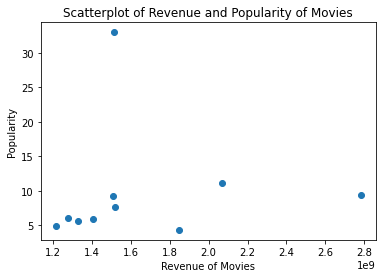

In [25]:
# We plot graphs of the revenie against various fratures to see which ones had strong corelations.
# Popularity, Budget, length, vote_count and release year

# We store revenue and popularity in python variables
revenue = revenue_df['revenue']
popularity = revenue_df['popularity']

# Render
plt.scatter(revenue, popularity)

# Tweak and Label
plt.title('Scatterplot of Revenue and Popularity of Movies')
plt.xlabel('Revenue of Movies')
plt.ylabel('Popularity')

# Display
plt.show()

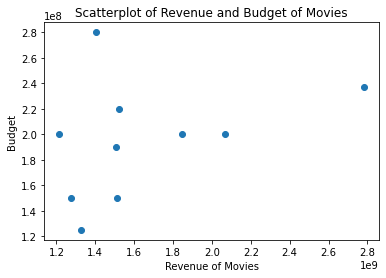

In [26]:
# We store revenue and budget in python variables
revenue = revenue_df['revenue']
budget = revenue_df['budget']

# Render
plt.scatter(revenue, budget)

# Tweak and Label
plt.title('Scatterplot of Revenue and Budget of Movies')
plt.xlabel('Revenue of Movies')
plt.ylabel('Budget')

# Display
plt.show()

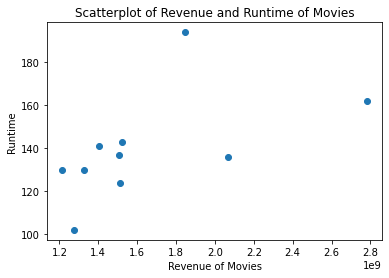

In [27]:
# We store revenue and runtime in python variables
revenue = revenue_df['revenue']
runtime = revenue_df['runtime']

# Render
plt.scatter(revenue, runtime)

# Tweak and Label
plt.title('Scatterplot of Revenue and Runtime of Movies')
plt.xlabel('Revenue of Movies')
plt.ylabel('Runtime')

# Display
plt.show()

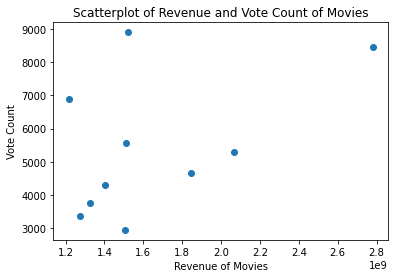

In [28]:
# We store revenue and vote_count of movies in python variables
revenue = revenue_df['revenue']
vote_count = revenue_df['vote_count']

# Render
plt.scatter(revenue, vote_count)

# Tweak and Label
plt.title('Scatterplot of Revenue and Vote Count of Movies')
plt.xlabel('Revenue of Movies')
plt.ylabel('Vote Count')

# Display
plt.show()

From the multiple graphs plotted, we can conclude that the following features are associated with the top 10 revenue movies:

- Release Year
- Budget
- Length 
These are the features that indicate a correlation with the revenue generated from the 10 movies.

**Question 5:** Which genres are most popular from year to year?

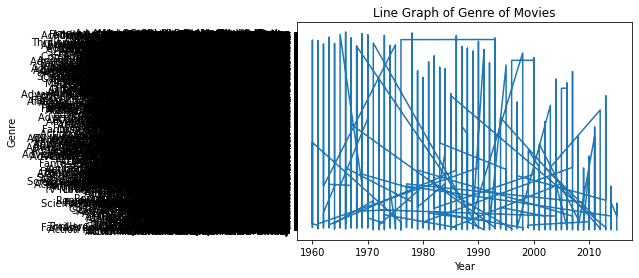

In [22]:
# Question 5
# ---
# Which genres are most popular from year to year?
# ---
#

# Prepare

#years = df['release_year'].tolist() # tolist() returns a list of values


# Render
# plt.figure(figsize=(14, 5))
genres = df['genres'].str.replace('|',' ')
year = df['release_year']

# Plot the graph
plt.plot(year, genres)

# Tweak & Label
plt.title('Line Graph of Genre of Movies')
plt.xlabel('Year')
plt.ylabel('Genre')

# Display
plt.show()

### 5.b) Recommendations

From the above analysis, below are our recommendations:



The kind of movies that they should create in order to have a profitable are:

- Those with a runtime of 150-200; they tend to receive higher vote counts.
- Themed around the years of 2014-2015; the moviesproduced in these years pulled in the most profits. Whether it is in directing style or plot settings.

It is important to note that budget does not necessarily matter; movies with high budgets as well as low budgets have performed the same in regard to vote count, revenue and popularity.




## 6. Challenging your Solution

It is not evident which genre is most popular from year to year; the graph plotted does not offer clear insights.

## 7. Follow up questions

During this step, you rethink and propose other ways that you can improve your solution.

### a). Did we have the right data?

Yes, the data was useful in gaining insights and knowledge in the movie making industry.

### b). Do we need other data to answer our question?

You can look into the questions you brainstormed that you weren't taken into account during analysis due to a lack of data. Were those questions important to have been left out  of your analysis?

The data used was not inclusive of movies from other regions/companies i.e Bollywood, Nollywood, Anime and others... thus does not give a conclusive overview of the film industry.

In addition to this, it would have been helpful to know if any of the movies had been nominated for or won awards in measuring their successes.

### c). Did we have the right question?

Were there any other questions that we needed to have answered?

Yes the questions are: 
- Which actors/actresses are best in ensuring larger profits?
- Are there prominent production companies and producers in the industry?
